**Project: Sentiment Analysis of IMDB Movie Reviews**



This project is aimed processing and analysing raw data for which we used IMDB Review dataset which consists of Review and Sentiment. This being part of Sentiment Analysis for IMDB Movie Reviews.

**Importing all necessary Librabries**

In [ ]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from spacy import displacy
from spacy.lang.en import STOP_WORDS

nlp = spacy.load('en_core_web_sm')
STOP_WORDS = nlp.Defaults.stop_words

from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

import nltk
from nltk import RegexpParser
import nltk




In [ ]:
nltk.download('averaged_perceptron_tagger')

# Reading Dataset from the comma seperated file
file_path = 'IMDB Dataset.csv'
df = pd.read_csv(file_path)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


**Exploratory Data Analysis**

Dataset:

The dataset is taken from open-source platform called Kaggle (URL). Our dataset consists of 2 features that is review and sentiments. Sentiments feature has two unique value that is Positive sentiment and Negative sentiment. Our dataset is a balanced dataset that has 25000 records for both the classes.


In [ ]:
print("First few rows of the IMDb Review dataset:")
print(df.head())

First few rows of the IMDb Review dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
review       0
sentiment    0
dtype: int64


In [ ]:
# Explore unique values in categorical columns
print("\nUnique values in 'sentiment' column:")
print(df['sentiment'].value_counts())


Unique values in 'sentiment' column:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


We have 50000 (50K) records in our dataset. Our dataset is balanced dataset. In order to ease the process we are considering only 2000 records as our sample dataset.

In [ ]:
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']

sample_len = 1000
sampled_positive_reviews = positive_reviews.sample(n=sample_len, random_state=82)
sampled_negative_reviews = negative_reviews.sample(n=sample_len, random_state=82)

dataset = pd.concat([sampled_positive_reviews, sampled_negative_reviews])
dataset = dataset.sample(frac=1, random_state=82).reset_index(drop=True)

Stratifies Sampling and visualisation

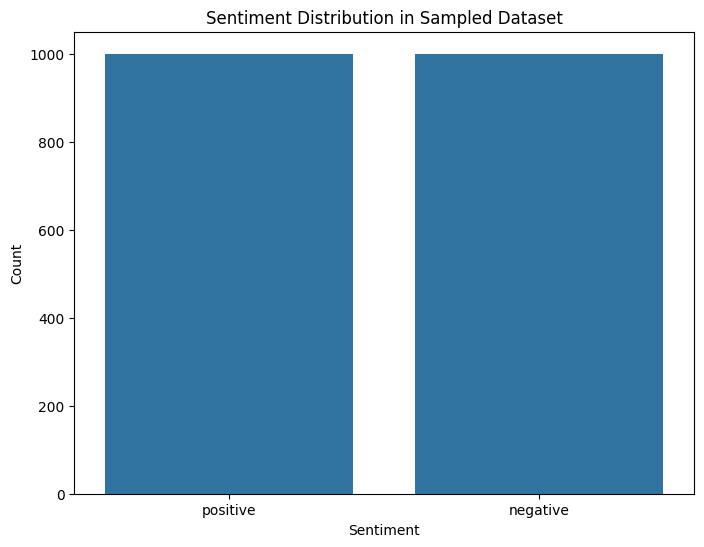

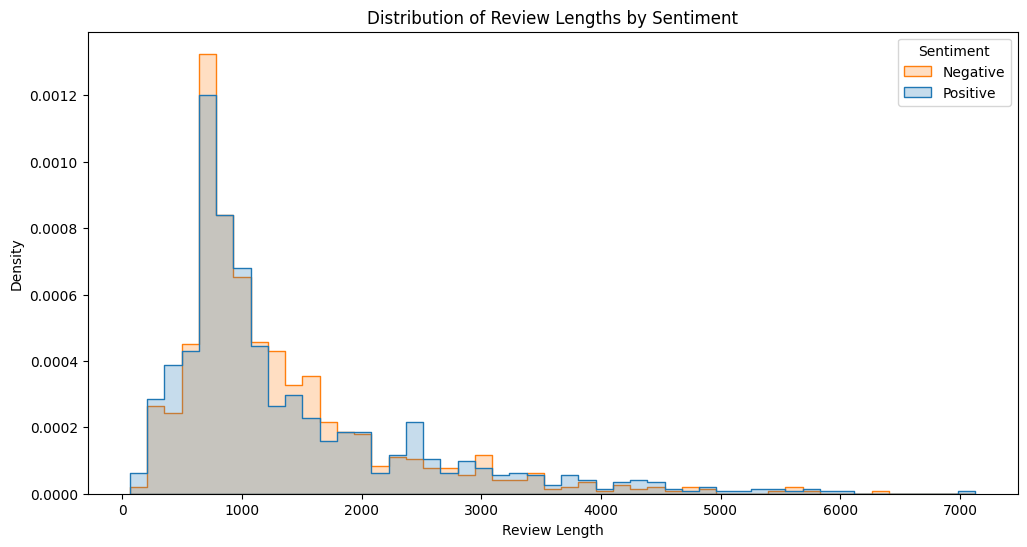

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=dataset)
plt.title('Sentiment Distribution in Sampled Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

dataset['review_length'] = dataset['review'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=dataset, x='review_length', hue='sentiment', element='step', stat='density', common_norm=False)
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Density')
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])
plt.show()


**Data Preprocessing**

Dataset is processed using spacy framework. Our dataset has 50000 records, we have used random stratified sampling technique to get sample dataset. We have checked for missing values and datatype of each feature using Panda’s library. Further, we did preprocess using spacy functionality that includes various operations like lowercase conversion, removing stop words, removing punctuation, considering only alphanumeric values, lemmatisation.


In [ ]:
def preprocess_text(text):
    text = text.lower()
    tokens = nlp(text)
    filtered_tokens = [token.text for token in tokens if token.text not in STOP_WORDS and token.text not in string.punctuation]
    alphanumeric_tokens = [token for token in filtered_tokens if token.isalnum()]

    return ' '.join(alphanumeric_tokens)

In [ ]:
dataset['preprocessed_review'] = dataset['review'].apply(preprocess_text)

print("First few rows of the pre-processed IMDb Review dataset:")
print(dataset[['review', 'preprocessed_review', 'sentiment']].head())

First few rows of the pre-processed IMDb Review dataset:
                                              review  \
0  Jim Carrey and Morgan Freeman along with Jenni...   
1  I thought Choke had potential, but I thought i...   
2  Sophisticated sex comedies are always difficul...   
3  It's up there with Where's Poppa, The Groove T...   
4  The narrative affirms the classic image of goo...   

                                 preprocessed_review sentiment  
0  jim carrey morgan freeman jennifer aniston com...  positive  
1  thought choke potential thought better film in...  negative  
2  sophisticated sex comedies difficult pull look...  positive  
3  poppa groove tube putney swope memorializes ny...  positive  
4  narrative affirms classic image good versus ev...  positive  


Visualisation of dataset with word cloud.

In [ ]:
from wordcloud import WordCloud

In [ ]:
def word_cloud(data: str):
    wordcloud = WordCloud().generate(data)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
review_data = list(dataset['review'])

In [ ]:
for i in range(len(review_data)):
    review_data2 = "".join(review_data[i])

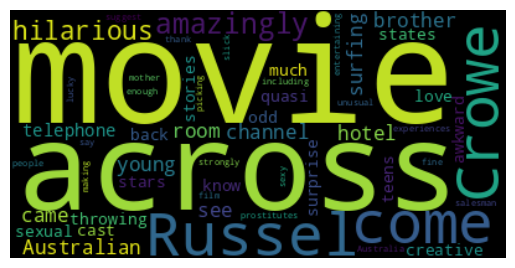

In [ ]:
word_cloud(review_data2)

Data analysis using NLP features.

In [ ]:
def advanced_nlp_tasks(text):
    text = text.lower()

    doc = nlp(text)
    lemmatized_tokens = []
    pos_tags = []
    syntactic_relations = []
    named_entities = []
    numeric_symbols_punctuations = []
    # spacy_vec = []

    for token in doc:
        if token.text not in STOP_WORDS and token.text not in string.punctuation:
            # Lemmatization
            lemmatized_tokens.append(token.lemma_)
            pos_tags.append(token.pos_)
            # spacy_vec.append(token.vector)

            # Syntactic relations
            syntactic_relations.append((token.head.text, token.dep_))

            # Named entity extraction
            named_entities.append(token.ent_type_ if token.ent_type_ else 'Not an entity')

            if token.like_num:
                numeric_symbols_punctuations.append('Numeric')
            elif token.is_punct:
                numeric_symbols_punctuations.append('Punctuation')
            elif token.is_space:
                numeric_symbols_punctuations.append('Space')
            else:
                numeric_symbols_punctuations.append('Symbolic')

    if not lemmatized_tokens:
        print("No valid tokens found after preprocessing.")
        return pd.Series({
            'lemmatized_tokens': '',
            'pos_tags': '',
            'syntactic_relations': [],
            'named_entities': '',
            'numeric_symbols_punctuations': '',
            'count_vector': None,
            'parsed_tree': None
            # 'word2vec_model': None,
            # 'spacy_vec':None
        })

    vectorizer = CountVectorizer()
    count_vector = vectorizer.fit_transform([" ".join(lemmatized_tokens)])



    # word2vec_model = Word2Vec([lemmatized_tokens], vector_size=100, window=5, min_count=1, workers=4)
    # word2vec_model.train([lemmatized_tokens], total_examples=len(lemmatized_tokens), epochs=10)

    grammar = "NP: {<DT>?<JJ>*<NN>}"
    chunk_parser = RegexpParser(grammar)
    parsed_tree = chunk_parser.parse(nltk.pos_tag(lemmatized_tokens))

    return pd.Series({
        'lemmatized_tokens': ' '.join(lemmatized_tokens),
        'pos_tags': ' '.join(pos_tags),
        'syntactic_relations': syntactic_relations,
        'named_entities': ' '.join(named_entities),
        'numeric_symbols_punctuations': ' '.join(numeric_symbols_punctuations),
        'count_vector': count_vector.toarray().flatten(),
        'parsed_tree': parsed_tree
        # 'word2vec_model': word2vec_model,
        # 'spacy_vec':spacy_vec
    })

advanced_nlp_results = dataset['preprocessed_review'].apply(advanced_nlp_tasks)
dataset = pd.concat([dataset, advanced_nlp_results], axis=1)

# print("First few rows of the IMDb Review dataset with advanced NLP results:")
# print(dataset.head())


Implemented Lemmatization, Syntactic relations, Named entity extraction, addressed punctuations removal, spaces, symbols.


In [ ]:
print("First few rows of the IMDb Review dataset with advanced NLP results:")
print(dataset.head())

First few rows of the IMDb Review dataset with advanced NLP results:
                                              review sentiment  review_length  \
0  Jim Carrey and Morgan Freeman along with Jenni...  positive            930   
1  I thought Choke had potential, but I thought i...  negative            708   
2  Sophisticated sex comedies are always difficul...  positive           3471   
3  It's up there with Where's Poppa, The Groove T...  positive           1257   
4  The narrative affirms the classic image of goo...  positive           3115   

                                 preprocessed_review  \
0  jim carrey morgan freeman jennifer aniston com...   
1  thought choke potential thought better film in...   
2  sophisticated sex comedies difficult pull look...   
3  poppa groove tube putney swope memorializes ny...   
4  narrative affirms classic image good versus ev...   

                                   lemmatized_tokens  \
0  jim carrey morgan freeman jennifer aniston com..

In [ ]:
dataset.columns

Index(['review', 'sentiment', 'review_length', 'preprocessed_review',
       'lemmatized_tokens', 'pos_tags', 'syntactic_relations',
       'named_entities', 'numeric_symbols_punctuations', 'count_vector',
       'parsed_tree'],
      dtype='object')

In [ ]:

dataset.shape

(2000, 11)

**Word Embedding using spacy.**

In [ ]:
# glove word embedding
processed_docs = list(nlp.pipe(dataset['lemmatized_tokens']))
spacy_vectors = np.array([doc.vector for doc in processed_docs])
spacy_vectors

array([[ 0.08551635, -0.7443628 ,  0.09509701, ...,  0.79015476,
        -0.13801844,  0.03069345],
       [ 0.05372489, -0.8166252 ,  0.13644557, ...,  0.7126864 ,
        -0.24716432,  0.13149934],
       [ 0.07153264, -0.83145285,  0.12526244, ...,  0.7564315 ,
        -0.20528096,  0.09742786],
       ...,
       [-0.06497436, -0.83711034,  0.11688121, ...,  0.7066653 ,
        -0.17023198,  0.16269402],
       [ 0.04391935, -0.82534945,  0.06085311, ...,  0.7433238 ,
        -0.1961407 ,  0.07150718],
       [ 0.08578906, -0.8179814 ,  0.02199483, ...,  0.7946806 ,
        -0.15257552,  0.14231846]], dtype=float32)

In [ ]:
spacy_vectors.shape

(2000, 96)

In the below code, we have plotted dependency parsing visualisation using displacy. It is working, but it takes much more time to execute therefore, we are commenting it out.

**Modelling:**

1.   SVM Algorithm
2.   Logistic Regression Model
3.   Naive Bayes Algorithm
4.   Decision Tree Algorithm
5.   Spacy built-in Neural Network Model



Model Selection:

Our dataset is related to sentiment analysis. There two features available in the dataset, reviews feature is an independent feature and Sentiment feature has two unique values is a dependent variable, It a classification problem under supervised learning. Therefore, we have used four different classification models in our project. We have used Logistic Regression, Support Vector Machine algorithm, Naive Bayed Model, Decision Tree model and Spacy built-in neural network model.


# *Support Vector Machine*


Importing necessary libraries.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Data spliting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['lemmatized_tokens'], dataset['sentiment'], test_size=0.2, random_state=42 )

In [ ]:
def tokenize(text):
    nlp = spacy.blank('xx')
    return [token.text for token in nlp(text)]

In [ ]:
pipeline = Pipeline([
    # ('vectorizer', CountVectorizer(tokenizer=tokenize)),
    ('vectorizer', TfidfVectorizer(tokenizer=tokenize)),
    ('classifier', SVC(kernel='linear'))
])

Model Training

In [ ]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function tokenize at 0x7813adbf3f40>)),
                ('classifier', SVC(kernel='linear'))])

Model Prediction

In [ ]:
predictions = pipeline.predict(X_test)

Model Evaluation

In [ ]:
print('Accuracy', accuracy_score(y_test, predictions))
print('\nClassification Report;\n', classification_report(y_test, predictions))

Accuracy 0.8375

Classification Report;
               precision    recall  f1-score   support

    negative       0.89      0.79      0.84       213
    positive       0.79      0.89      0.84       187

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



<Axes: >

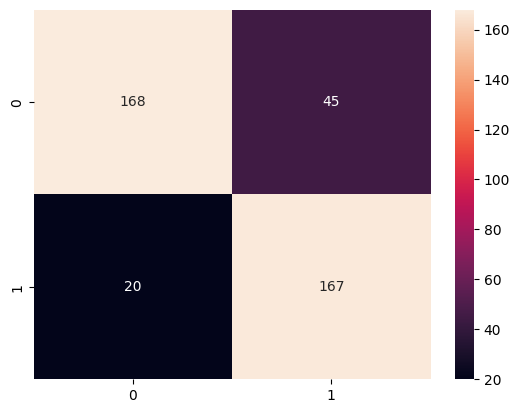

In [ ]:
 sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d')

# Logistic Regression


Importing necessary libraries.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

Converting text to Vector

In [ ]:
tfidfvectorizer = TfidfVectorizer()
X = tfidfvectorizer.fit_transform(dataset['lemmatized_tokens'])
# X = spacy_vectors
y = dataset['sentiment']

Dataset Splitting

In [ ]:
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X, y, test_size=0.2, random_state=42 )

Model Training

In [ ]:
LG_classifier = LogisticRegression()
LG_classifier.fit(X_train_lg, y_train_lg)

LogisticRegression()

Predict and evalutate

In [ ]:
y_pred_lg = LG_classifier.predict(X_test_lg)
print('Accuracy', accuracy_score(y_test_lg,y_pred_lg))

Accuracy 0.815


In [ ]:
print(classification_report(y_test_lg,y_pred_lg))

              precision    recall  f1-score   support

    negative       0.91      0.73      0.81       213
    positive       0.75      0.91      0.82       187

    accuracy                           0.81       400
   macro avg       0.83      0.82      0.81       400
weighted avg       0.83      0.81      0.81       400



<Axes: >

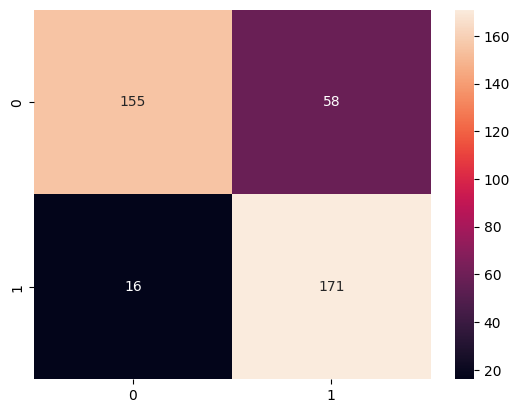

In [ ]:
 sns.heatmap(confusion_matrix(y_test_lg,y_pred_lg), annot=True, fmt='d')

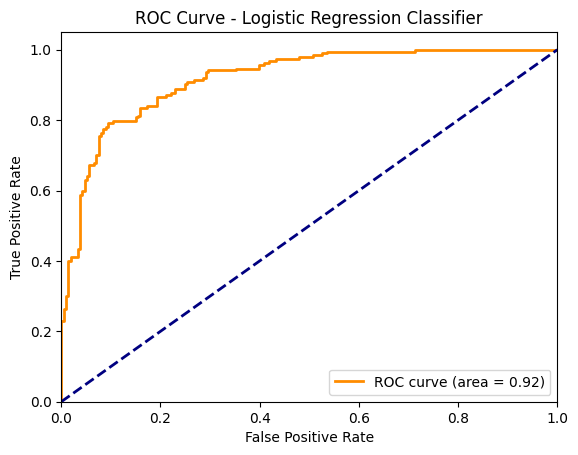

Accuracy: 0.815


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

# Convert categorical labels to binary labels
label_binarizer = LabelBinarizer()
y_test_bin_lg = label_binarizer.fit_transform(y_test_lg)

# Predict probabilities for the positive class
y_pred_proba_lg = LG_classifier.predict_proba(X_test_lg)[:, 1]

# Compute ROC curve and ROC area
fpr_lg, tpr_lg, _ = roc_curve(y_test_bin_lg, y_pred_proba_lg)
roc_auc_lg = auc(fpr_lg, tpr_lg)

# Plot ROC curve
plt.figure()
plt.plot(fpr_lg, tpr_lg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Classifier')
plt.legend(loc="lower right")
plt.show()

# Print accuracy
y_pred_lg = LG_classifier.predict(X_test_lg)
print('Accuracy:', accuracy_score(y_test_lg, y_pred_lg))

# Naive Bayes Model

Importing necessary libraries.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix

Converting text to Vector

In [ ]:
tfidfvectorizer = TfidfVectorizer()
X = spacy_vectors #tfidfvectorizer.fit_transform(dataset['lemmatized_tokens'])
y = dataset['sentiment']

Dataset splitting

In [ ]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_nb.shape

(1600, 96)

In [ ]:
y_train_nb.shape

(1600,)

Model Training

In [ ]:
if isinstance(X_train_nb, csr_matrix):
    X_train_nb = X_train_nb.toarray()
if isinstance(X_test_nb, csr_matrix):
    X_test_nb = X_test_nb.toarray()

NB_classifier = GaussianNB()

NB_classifier.fit(X_train_nb, y_train_nb)


GaussianNB()

Predict and evalutate

In [ ]:
y_pred_nb = NB_classifier.predict(X_test_nb)
print('Accuracy:', accuracy_score(y_test_nb, y_pred_nb))

Accuracy: 0.565


In [ ]:
print('Classification Report:')
print(classification_report(y_test_nb, y_pred_nb))

Classification Report:
              precision    recall  f1-score   support

    negative       0.59      0.61      0.60       213
    positive       0.54      0.51      0.52       187

    accuracy                           0.56       400
   macro avg       0.56      0.56      0.56       400
weighted avg       0.56      0.56      0.56       400



# Decision Tree

Importing necessary libraries.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score

Converting text to Vector

In [ ]:
tfidfvectorizer = TfidfVectorizer()
countvectorizer = CountVectorizer()
X = tfidfvectorizer.fit_transform(dataset['lemmatized_tokens'])
# X = countvectorizer.fit_transform(dataset['lemmatized_tokens'])
# X = spacy_vectors
y = dataset['sentiment']

Dataset Splitting

In [ ]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=42 )

In [ ]:
X_train_dt.shape

(1600, 20718)

In [ ]:
y_train_dt.shape

(1600,)

Model Training

In [ ]:
# Initialize the Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, criterion='gini')
# Hyper Parameters

# Train the classifier on the training data
decision_tree_classifier.fit(X_train_dt, y_train_dt)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

Model Prediction

In [ ]:
# Predict the sentiment labels for the test set
y_pred_dt = decision_tree_classifier.predict(X_test_dt)

Here, after hyper parameter tunning the accuracy increase to 66%.
Hyper parameters: - (max_depth=10, min_samples_split=5, min_samples_leaf=2, criterion='gini'), before that it was 61%.

Evaluation of Decision tree model

In [ ]:
# Evaluate the accuracy of the classifier
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print("Decision Tree Classifier Accuracy:", accuracy_dt)

print(classification_report(y_test_dt, y_pred_dt))

Decision Tree Classifier Accuracy: 0.7
              precision    recall  f1-score   support

    negative       0.81      0.57      0.67       213
    positive       0.63      0.84      0.72       187

    accuracy                           0.70       400
   macro avg       0.72      0.71      0.70       400
weighted avg       0.73      0.70      0.70       400



<Axes: >

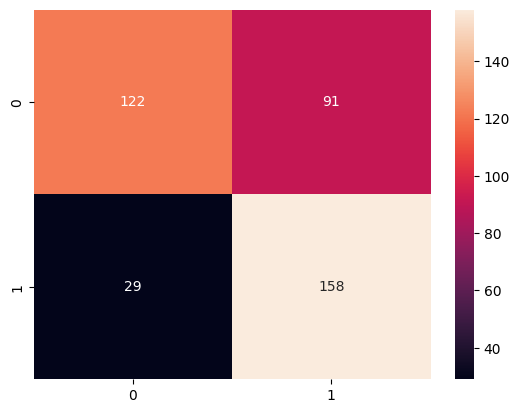

In [ ]:
 sns.heatmap(confusion_matrix(y_test_dt, y_pred_dt), annot=True, xticklabels='auto', yticklabels='auto', fmt='d')

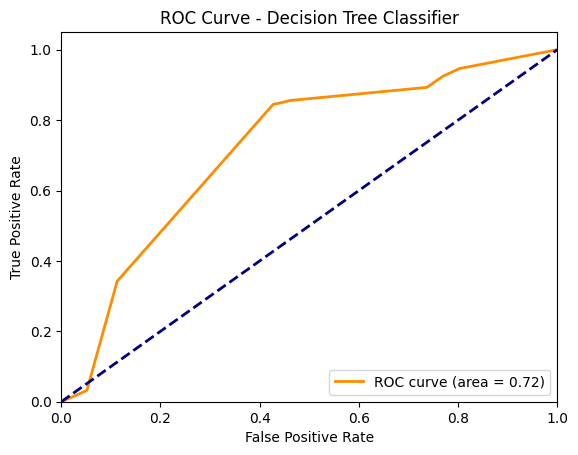

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

# Convert categorical labels to binary labels
label_binarizer = LabelBinarizer()
y_test_bin = label_binarizer.fit_transform(y_test_dt)

# Get the predicted probabilities for the positive class
y_pred_proba_dt = decision_tree_classifier.predict_proba(X_test_dt)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()



# Using Spacy model

Referred: NLP In-class activity 2

In [ ]:
from spacy.pipeline.textcat import Config, single_label_cnn_config
from spacy.training.example import Example
from spacy.util import minibatch

In [ ]:
nlp = spacy.blank('en')

In [ ]:
#Adding  the  TextCategorizer  to  the  pipeline
if 'textcat' not in nlp.pipe_names:
    textcat = nlp.add_pipe('textcat', last=True)
else:
    textcat = nlp.get_pipe('textcat')

In [ ]:
categories = dataset['sentiment'].unique().tolist()
categories

['positive', 'negative']

In [ ]:
for cat in categories:
  textcat.add_label(cat)

In [ ]:
dataset.columns

Index(['review', 'sentiment', 'review_length', 'preprocessed_review',
       'lemmatized_tokens', 'pos_tags', 'syntactic_relations',
       'named_entities', 'numeric_symbols_punctuations', 'count_vector',
       'parsed_tree'],
      dtype='object')

In [ ]:
categories_temp = categories

Converting the dataset to the format to be feed into the model.

In [ ]:
def df_to_spacy_format(dataset1):
    new_dataset = []
    for index, row in dataset1.iterrows():
        text = row['preprocessed_review']

        categories = categories_temp  #unique_labels
        default_cats = {category: 0 for category in categories}
        cats_dict = {"cats": default_cats}
        cats_dict["cats"][dataset1.loc[index, 'sentiment']] = 1

        new_dataset.append((text, cats_dict))
    return new_dataset

In [ ]:
new_dataset = df_to_spacy_format(dataset)

In [ ]:
dataset[:2]

,review,sentiment,review_length,preprocessed_review,lemmatized_tokens,pos_tags,syntactic_relations,named_entities,numeric_symbols_punctuations,count_vector,parsed_tree
0,Jim Carrey and Morgan Freeman along with Jenni...,positive,930,jim carrey morgan freeman jennifer aniston com...,jim carrey morgan freeman jennifer aniston com...,PROPN PROPN PROPN PROPN PROPN PROPN PROPN NOUN...,"[(aniston, compound), (aniston, compound), (an...",PERSON PERSON PERSON PERSON PERSON PERSON Not ...,Symbolic Symbolic Symbolic Symbolic Symbolic S...,"[1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, ...","[[(jim, NN)], [(carrey, NN)], [(morgan, JJ), (..."
1,"I thought Choke had potential, but I thought i...",negative,708,thought choke potential thought better film in...,think choke potential think well film interest...,VERB PROPN ADJ VERB ADJ NOUN ADJ NOUN VERB ADV...,"[(thought, ROOT), (potential, compound), (thou...",Not an entity Not an entity Not an entity Not ...,Symbolic Symbolic Symbolic Symbolic Symbolic S...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[(think, VB), (choke, VBD), [(potential, JJ), ..."


In [ ]:
new_dataset[:2]

[('jim carrey morgan freeman jennifer aniston combine funniest movies far 2003 season late good improvement carrey past crazy personally forgetable roles past comedies slightly toned carrey antics zap crackle old self carrey powerfully carries movie height laughter dramatic tearfully somber moments elements jim real acting abilities continue movie delightful summer entertainment hits buttons including dramatic elements goofy moments fit perfectly script lacking superbly polished ensemble comedy drama bruce almightly deserves credit great date movie solid message soft spiritual cynicism parody maintains good natured taste stars',
  {'cats': {'positive': 1, 'negative': 0}}),
 ('thought choke potential thought better film interesting twists turns kind pointless showing background main characters awry sort useless help movie dennis hopper finest hour main saving grace movie michael madsen performance excellent movie makes mr blonde look like nice guy watchable left thinking things differen

In [ ]:
import random

random.shuffle(new_dataset)

print(new_dataset)

Dataset splitting

In [ ]:
X = new_dataset[:]
y = dataset['sentiment'].iloc[:]

In [ ]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size=0.30, random_state=42)

Unsupervised Model Training using Spacy built-in model

In [ ]:
def nn_spacy(num_epochs, batch_size, data_train):

    # Training the text categorization model
    optimizer = nlp.initialize()
    tot_loss = []
    for epoch in range(num_epochs):  # Number of training epochs
        losses = {}
        batches = minibatch(data_train, size=batch_size)
        for batch in batches:
            examples = [Example.from_dict(nlp.make_doc(text), annotations) for text, annotations in batch]
            nlp.update(examples, drop=0.2, losses=losses, sgd=optimizer)
        print(losses['textcat'])
        # break
        tot_loss.append(losses['textcat'])

    return tot_loss, nlp

data_train = X_train_nn


Model Training

In [ ]:
total_loss, model = nn_spacy(15, 12, data_train)
print('Model Training')

28.448574006557465
20.995560832321644
14.472389050759375
9.90543643484125
7.857027183699756
5.829428230378653
3.766554600615315
2.6120472990920227
1.4476855151445784
1.2094010751540063
1.043612666475515
1.4390478348674565
1.3463719616153131
0.7230167565692864
1.4215268445598483
Model Training


Visualising model loss plot.

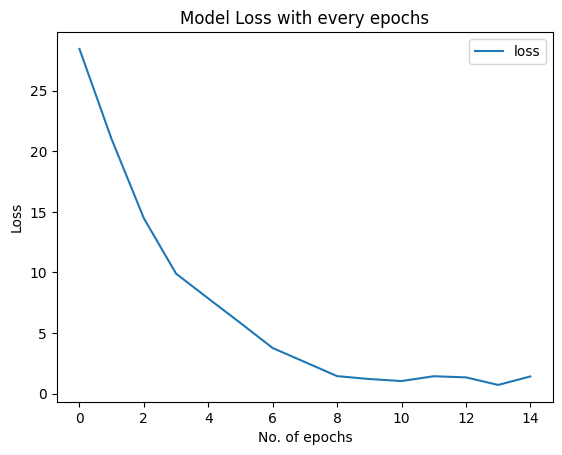

In [ ]:
plt.plot(total_loss,label='loss')
plt.title('Model Loss with every epochs')
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.legend()  # Plot the chart
plt.show()  # display

Calculating Accuracy

In [ ]:
def find_marked_categories(cat_dict):
    marked_categories = [category for category, value in cat_dict['cats'].items() if value == 1]
    return marked_categories[0]


def predict_and_evaluate(model, test_data):
    correct_predictions = 0
    predictions = []

    for text, true_labels in test_data:
        doc = model(text)
        prediction = doc.cats

        highest_category = max(prediction, key=prediction.get)
        if find_marked_categories(true_labels) == highest_category:
            correct_predictions += 1

    return correct_predictions/len(test_data)


In [ ]:
predict_and_evaluate(model, X_test_nn)

0.7916666666666666

In [ ]:
# --------------------------------------------------------------------

##Document the process and findings:

Firstly, this project is aimed Pre processing of Raw Data for which we used IMDB Review dataset which consists of Review and Sentiment. This being part of Sentiment Analysis for IMDB Movie Reviews.

**Dataset**:
The dataset is taken from open-source platform called Kaggle (URL). Our dataset consists of 2 features that is review and sentiments. Sentiments feature has two unique value that is Positive sentiment and Negative sentiment. Our dataset is a balanced dataset that has 25000 records for both the classes.

**Data Preprocessing:**
we intially started out with basic exploration of data, like Data Loading, Importing all the required Libraries and modules one after the other.

We started working and realised it is taking a lot of time to process 50K records for preprocessing, for which we considered some sample reviews positive and negative, randomly and started working with 2000 records each. Tried to visualize the same.

Implemented Lemmatization, Syntactic relations, Named entity extraction, addressed punctuations removal, spaces, symbols.
As part of the requirement document, tried implementing Vectorizer, Word2Vec, Parsed_tree.


**Model Selection**: Our dataset is related to sentiment analysis. There two features available in the dataset, reviews feature is an independent feature and Sentiment feature has two unique values is a dependent variable, It a classification problem under supervised learning. Therefore, we have used four different classification models in our project. We have used Logistic Regression, Support Vector Machine algorithm, Naïve Bayes algorithm, Decision Tree model and Spacy built-in neural network model.

**Model Training and Evaluation**: Before training the models, the processed data is converted into vector using Bag of Word vectorisation Technique and TF-IDF Vectorisation Technique. Further processed data is split into training set and Testing set to feed into the model training.
We have using various hyper parameter tunning to improve the model performance.

In Logistic Regression, we have tried using two word embedding techniques like ‘TF-IDF’ and ‘Spacy’ vectorisation. Using TF-IDF, ‘word2vec’ technique we can achieve 80% accuracy and ROC curve value is 0.91 whilst, with spacy vectorisation we were able to achieve just 63.75% accuracy and ROC curve value is 0.66.

With Decision Tree Regressor, we have tried using various hyper parameters, like 3 word embedding technique, from that TD-IDF is most effective technique, with other hyper parameters in Decision Regressor like max depth value as 10, minimum sample split value as 5, minimum sample leaf value as 2, Gini impurity criterion. With these hyper parameters, we have achieved 70% testing accuracy.
In SVM algorithm, using TD-IDF word embedding technique we have achieved 83% of testing accuracy, which suite as the best parameter for model training.

Using Spacy built-in model, dataset must be converted to a particular format such that it could fit to the model by converting each record in a tuple. After random shuffling of newly formatted dataset, it is feed into the model. Using hyper parameters like setting SGD optimiser, spacy loss calculation technique, dropout value to 0.2, 25 epochs and batch size value is 12, we were able to achieve 76.66% accuracy and 0.29 loss value.

**Observation:**
From our observation and Analysis, we could see that Logistic Regression and SVM is performing better than any Classification or Spacy Model with more than 80% accuracy.
It can Classify whether Positive and Negative.
